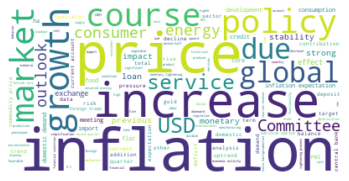

<AxesSubplot:ylabel='0'>

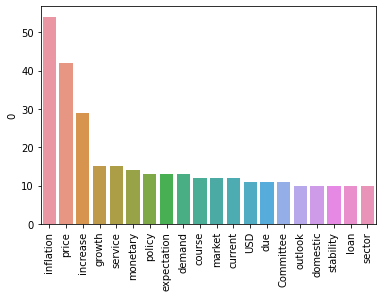

In [19]:
import nltk
import requests
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from io import BytesIO
import re
from string import digits
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from nltk.stem import WordNetLemmatizer 
import seaborn as sns

stopWords=set({"year","rate","last","June","point","wa","basis","index",
               "May","period","level","July","annual","good","monthly",
              "average","month","group","subgroup","first","April"})
 
url = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-24"
  

def get_cbrt_meeting_summary(url=url):
    """
    Fetches the meeting summary from the given URL using web scraping.

    Parameters:
        url (str): The URL of the webpage containing the meeting summary.

    Returns:
        list: A list of paragraphs containing the meeting summary.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    return soup.find_all("p", dir="ltr")

summary=get_cbrt_meeting_summary(url=url)


def clean_and_merged(input):
    """
    Cleans and merges the paragraphs in the input list.

    This function takes a list of paragraphs as input, and for each paragraph,
    it removes any occurrences of the "\xa0" character (non-breaking space)
    and appends the cleaned paragraph to a new list. The cleaned paragraphs
    are then merged into a single list and returned.

    Parameters:
        input (list): A list of paragraphs to be cleaned and merged.

    Returns:
        list: A list of cleaned and merged paragraphs.
    """
    summary_merged = []
    for i in input:
        i = i.text.replace("\xa0", "")
        summary_merged.append(i)
    return summary_merged

summary_merged=clean_and_merged(summary)


def removing_digits(input):
    remove_digits = str.maketrans('', '', digits)
    res = str(input).translate(remove_digits)
    res2 = re.sub(r'[^\w\s]', '', res)
    return res2

remove_digits=removing_digits(summary_merged)

def lemmatize(input):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(input)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

lemmatized_output=lemmatize(remove_digits)



def tokenize_and_tagged(input):
    tokens = nltk.word_tokenize(input)
    tagged = nltk.pos_tag(tokens)
    tagged=pd.DataFrame(tagged)
    tagged=tagged[tagged[1].str.startswith("JJ")|tagged[1].str.startswith("N")]
    return tagged

tagged=tokenize_and_tagged(lemmatized_output)

def word_cloud(string):
    plt.axis("off")
    plt.imshow(WordCloud(background_color="white", stopwords=stopWords).generate(string), interpolation="bilinear")
    plt.show()

a=re.sub(r'[^\w\s]', '', tagged[0].to_string().replace("\n",""))
word_cloud_plot=word_cloud(removing_digits(a))
result=pd.DataFrame(tagged[0].value_counts())

def freq_bar_plot(df,n):
    df=pd.DataFrame(tagged[0].value_counts()).head(n)
    df = result[result.index.isin(list(stopWords)) ==False].head(n)
    my_plot=sns.barplot(data=df, x=df.index, y=0)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    return my_plot
    plt.show()

freq_bar_plot(df=result,n=20)

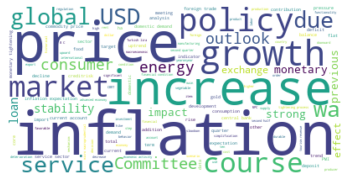

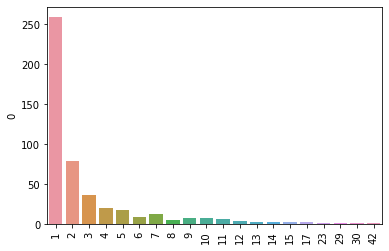

In [7]:
import nltk
import requests
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from io import BytesIO
import re
from string import digits
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from nltk.stem import WordNetLemmatizer 
import seaborn as sns

stopWords = set({
    "year", "rate", "last", "June", "point", "was", "basis", "index",
    "May", "period", "level", "July", "annual", "good", "monthly",
    "average", "month", "group", "subgroup", "first", "April"
})

url = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-24"
  
def get_cbrt_meeting_summary(url=url):
    """
    Fetches the meeting summary from the given URL using web scraping.

    Parameters:
        url (str): The URL of the webpage containing the meeting summary.

    Returns:
        list: A list of paragraphs containing the meeting summary.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    #summary = soup.find_all("p", dir="ltr")
    return soup.find_all("p", dir="ltr")

summary = get_cbrt_meeting_summary(url=url)

def clean_and_merged(input): 
    """
    Cleans and merges the input paragraphs into a single string.

    Parameters:
        input (list): List of paragraphs to be cleaned and merged.

    Returns:
        list: A list of cleaned and merged paragraphs.
    """
    summary_merged = []
    for i in input:
        i = i.text.replace("\xa0", "")
        summary_merged.append(i)
    return summary_merged

summary_merged = clean_and_merged(summary)

def removing_digits(input):
    """
    Removes digits and special characters from the input text.

    Parameters:
        input (str): The text to be processed.

    Returns:
        str: The processed text with digits and special characters removed.
    """
    remove_digits = str.maketrans('', '', digits)
    res = str(input).translate(remove_digits)
    res2 = re.sub(r'[^\w\s]', '', res)
    return res2

remove_digits = removing_digits(summary_merged)

def lemmatize(input):
    """
    Lemmatizes the input text using NLTK's WordNetLemmatizer.

    Parameters:
        input (str): The text to be lemmatized.

    Returns:
        str: The lemmatized text.
    """
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(input)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

lemmatized_output = lemmatize(remove_digits)

def tokenize_and_tagged(input):
    """
    Tokenizes the input text and performs part-of-speech tagging using NLTK.

    Parameters:
        input (str): The text to be tokenized and tagged.

    Returns:
        pandas.DataFrame: DataFrame containing the tagged words and their part-of-speech.
    """
    tokens = nltk.word_tokenize(input)
    tagged = nltk.pos_tag(tokens)
    tagged_df = pd.DataFrame(tagged)
    tagged_df = tagged_df[tagged_df[1].str.startswith("JJ") | tagged_df[1].str.startswith("N")]
    return tagged_df

tagged = tokenize_and_tagged(lemmatized_output)
a = re.sub(r'[^\w\s]', '', tagged[0].to_string().replace("\n", ""))

def word_cloud(string):
    """
    Generates and displays a word cloud from the input text.

    Parameters:
        string (str): The text for generating the word cloud.
    """
    plt.axis("off")
    plt.imshow(WordCloud(background_color="white", stopwords=stopWords).generate(string), interpolation="bilinear")
    plt.show()

word_cloud_plot = word_cloud(removing_digits(a))
result = pd.DataFrame(tagged[0].value_counts())

def freq_bar_plot(df, n):
    """
    Generates and displays a bar plot for the most frequent words in the input DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing word frequencies.
        n (int): Number of top words to be displayed in the plot.
    """
    df = pd.DataFrame(df[0].value_counts()).head(n)
    df = df[df.index.isin(list(stopWords)) == False].head(n)
    my_plot = sns.barplot(data=df, x=df.index, y=0)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    plt.show()

freq_bar_plot(result, n=20)
